In [1]:
path_lwf = '/home/karokaro/research-repositories/FACIL/results/cifar10_lwf_final_cifar10'

In [ ]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_lwf) if isfile(join(path_lwf, f))]
onlyfiles

['stdout-2025-01-22-12-09.txt',
 'args-2025-01-22-12-09.txt',
 'stderr-2025-01-22-10-57.txt',
 'stdout-2025-01-22-09-57.txt',
 'stderr-2025-01-22-10-17.txt',
 'args-2025-01-22-09-57.txt',
 'args-2025-01-22-11-32.txt',
 'raw_log-2025-01-22-10-36.txt',
 'stdout-2025-01-22-12-28.txt',
 'stdout-2025-01-22-10-36.txt',
 'stdout-2025-01-22-11-49.txt',
 'args-2025-01-22-10-57.txt',
 'stderr-2025-01-22-12-09.txt',
 'stdout-2025-01-22-10-17.txt',
 'raw_log-2025-01-22-09-57.txt',
 'raw_log-2025-01-22-10-17.txt',
 'raw_log-2025-01-22-11-49.txt',
 'stderr-2025-01-22-12-28.txt',
 'raw_log-2025-01-22-11-14.txt',
 'args-2025-01-22-12-28.txt',
 'args-2025-01-22-10-17.txt',
 'stderr-2025-01-22-10-36.txt',
 'raw_log-2025-01-22-10-57.txt',
 'stdout-2025-01-22-11-32.txt',
 'raw_log-2025-01-22-12-28.txt',
 'raw_log-2025-01-22-11-32.txt',
 'stdout-2025-01-22-11-14.txt',
 'args-2025-01-22-11-14.txt',
 'stdout-2025-01-22-10-57.txt',
 'stderr-2025-01-22-11-14.txt',
 'stderr-2025-01-22-11-32.txt',
 'stderr-2025-

In [3]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [4]:
import json
arg_dict = {}
for file in args:
    with open(join(path_lwf, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [5]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_lwf, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [6]:
res_dict

{'2025-01-22-10-36.txt': [{'group': 'valid',
   'iter': 1,
   'name': 'loss',
   'task': 0,
   'time': '2025-01-22-10-36',
   'value': 0.681434642791748},
  {'group': 'valid',
   'iter': 1,
   'name': 'acc',
   'task': 0,
   'time': '2025-01-22-10-36',
   'value': 50.0},
  {'group': 'train',
   'iter': 1,
   'name': 'patience',
   'task': 0,
   'time': '2025-01-22-10-36',
   'value': 5},
  {'group': 'train',
   'iter': 1,
   'name': 'lr',
   'task': 0,
   'time': '2025-01-22-10-36',
   'value': 0.1},
  {'group': 'valid',
   'iter': 2,
   'name': 'loss',
   'task': 0,
   'time': '2025-01-22-10-36',
   'value': 0.6303427171707153},
  {'group': 'valid',
   'iter': 2,
   'name': 'acc',
   'task': 0,
   'time': '2025-01-22-10-36',
   'value': 64.9},
  {'group': 'train',
   'iter': 2,
   'name': 'patience',
   'task': 0,
   'time': '2025-01-22-10-36',
   'value': 5},
  {'group': 'train',
   'iter': 2,
   'name': 'lr',
   'task': 0,
   'time': '2025-01-22-10-36',
   'value': 0.1},
  {'group':

In [7]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [4]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [8]:
len(res_dict)

3

In [9]:
import pandas as pd
import numpy as np
from itertools import chain
data = pd.DataFrame({'Approach': list(chain.from_iterable([['LWF' for i in range(5)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(5)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in range(5)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_tag" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(5)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/tmp/ipykernel_33984/1207693049.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot( data,  x='Task', y='Average Accuracy', ci=None)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

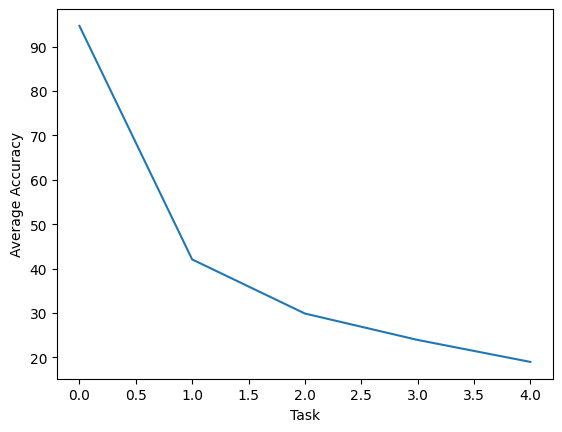

In [10]:
import seaborn as sns
sns.lineplot( data,  x='Task', y='Average Accuracy', ci=None)

In [11]:
data.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
LWF      0                94.65                 NaN
         1                42.05               94.65
         2                29.87               89.38
         3                23.92               89.45
         4                18.97               90.90

In [12]:
path_ewc = '/home/karokaro/research-repositories/FACIL/results/cifar10_ewc_final_cifar10'

In [13]:
onlyfiles = [f for f in listdir(path_ewc) if isfile(join(path_ewc, f))]
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [14]:
import json
arg_dict = {}
for file in args:
    with open(join(path_ewc, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [15]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_ewc, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [16]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [4]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [17]:
data_ewc = pd.DataFrame({'Approach': list(chain.from_iterable([['EWC' for i in range(5)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(5)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in range(5)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_tag" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(5)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

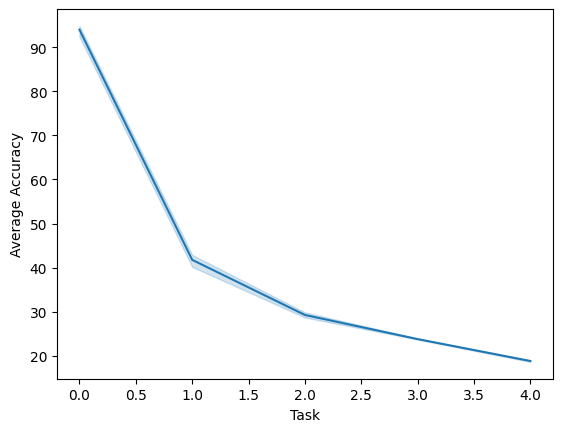

In [18]:
sns.lineplot( data_ewc,  x='Task', y='Average Accuracy')

In [19]:
data_ewc.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
EWC      0                94.00                 NaN
         1                41.77               94.00
         2                29.26               88.77
         3                23.78               88.43
         4                18.81               90.10

In [20]:
path_lwm = '/home/karokaro/research-repositories/FACIL/results/cifar10_lwm_final_cifar10'

In [21]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_lwm) if isfile(join(path_lwm, f))]
onlyfiles

['stderr-2025-01-22-14-23.txt',
 'stdout-2025-01-22-16-18.txt',
 'stdout-2025-01-22-13-48.txt',
 'args-2025-01-22-12-39.txt',
 'args-2025-01-22-14-23.txt',
 'args-2025-01-22-13-11.txt',
 'args-2025-01-22-13-48.txt',
 'stderr-2025-01-22-13-48.txt',
 'stdout-2025-01-22-12-39.txt',
 'raw_log-2025-01-22-13-48.txt',
 'stdout-2025-01-22-15-56.txt',
 'stderr-2025-01-22-14-47.txt',
 'raw_log-2025-01-22-15-26.txt',
 'stdout-2025-01-22-13-11.txt',
 'stderr-2025-01-22-12-39.txt',
 'args-2025-01-22-15-56.txt',
 'stderr-2025-01-22-13-11.txt',
 'args-2025-01-22-14-47.txt',
 'stderr-2025-01-22-15-56.txt',
 'stdout-2025-01-22-15-26.txt',
 'args-2025-01-22-16-47.txt',
 'raw_log-2025-01-22-13-11.txt',
 'stderr-2025-01-22-16-47.txt',
 'raw_log-2025-01-22-16-18.txt',
 'stdout-2025-01-22-14-23.txt',
 'stderr-2025-01-22-15-26.txt',
 'raw_log-2025-01-22-15-56.txt',
 'stdout-2025-01-22-14-47.txt',
 'stdout-2025-01-22-16-47.txt',
 'stderr-2025-01-22-16-18.txt',
 'args-2025-01-22-16-18.txt',
 'raw_log-2025-01-2

In [22]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [23]:
import json
arg_dict = {}
for file in args:
    with open(join(path_lwm, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [24]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_lwm, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [25]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [4]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [26]:
import pandas as pd
import numpy as np
from itertools import chain
data_lwm = pd.DataFrame({'Approach': list(chain.from_iterable([['LWM' for i in range(5)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(5)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in range(5)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_tag" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(5)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

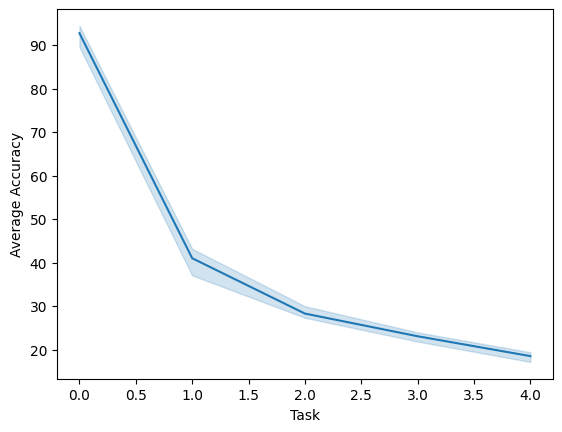

In [27]:
sns.lineplot( data_lwm,  x='Task', y='Average Accuracy')

In [28]:
data_lwm.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
LWM      0                92.73                 NaN
         1                40.99               92.73
         2                28.27               87.36
         3                23.05               86.51
         4                18.49               87.66

In [29]:
path_icarl = '/home/karokaro/research-repositories/FACIL/results/cifar10_icarl_final_cifar'

In [30]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_icarl) if isfile(join(path_icarl, f))]
onlyfiles

['stdout-2025-01-14-17-38.txt',
 'raw_log-2025-01-14-15-42.txt',
 'stdout-2025-01-14-16-07.txt',
 'raw_log-2025-01-14-16-07.txt',
 'stdout-2025-01-14-17-17.txt',
 'stdout-2025-01-14-15-56.txt',
 'args-2025-01-14-15-42.txt',
 'raw_log-2025-01-14-16-25.txt',
 'stderr-2025-01-14-17-38.txt',
 'args-2025-01-14-17-38.txt',
 'args-2025-01-14-16-07.txt',
 'stderr-2025-01-14-15-27.txt',
 'stdout-2025-01-14-17-06.txt',
 'stdout-2025-01-14-15-42.txt',
 'raw_log-2025-01-14-17-17.txt',
 'raw_log-2025-01-14-17-38.txt',
 'args-2025-01-14-15-56.txt',
 'raw_log-2025-01-14-15-27.txt',
 'args-2025-01-14-17-17.txt',
 'raw_log-2025-01-14-16-48.txt',
 'args-2025-01-14-15-27.txt',
 'stdout-2025-01-14-16-25.txt',
 'args-2025-01-14-16-25.txt',
 'stdout-2025-01-14-15-27.txt',
 'stderr-2025-01-14-17-17.txt',
 'stderr-2025-01-14-15-42.txt',
 'stdout-2025-01-14-16-48.txt',
 'args-2025-01-14-16-48.txt',
 'stderr-2025-01-14-16-25.txt',
 'stderr-2025-01-14-15-56.txt',
 'args-2025-01-14-17-06.txt',
 'stderr-2025-01-14

In [31]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [32]:
import json
arg_dict = {}
for file in args:
    with open(join(path_icarl, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [33]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_icarl, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [34]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [4]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [35]:
import pandas as pd
import numpy as np
from itertools import chain
data_icarl = pd.DataFrame({'Approach': list(chain.from_iterable([['iCaRL' for i in range(5)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(5)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in range(5)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_tag" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(5)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
data_icarl.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
iCaRL    0                89.72                 NaN
         1                59.29               16.48
         2                41.13               27.89
         3                33.22               35.67
         4                22.51               41.82

In [37]:
path_rere = '/home/karokaro/research-repositories/FACIL/results/cifar10_rere_lrp_final_cifar10'

In [38]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_rere) if isfile(join(path_rere, f))]
onlyfiles

['stdout-2025-01-13-18-48.txt',
 'args-2025-01-13-22-55.txt',
 'args-2025-01-14-07-22.txt',
 'stdout-2025-01-13-22-55.txt',
 'raw_log-2025-01-14-05-03.txt',
 'args-2025-01-14-00-59.txt',
 'args-2025-01-13-20-51.txt',
 'raw_log-2025-01-13-18-48.txt',
 'stdout-2025-01-13-16-41.txt',
 'stderr-2025-01-13-20-51.txt',
 'args-2025-01-13-14-38.txt',
 'raw_log-2025-01-13-20-51.txt',
 'stderr-2025-01-13-18-48.txt',
 'stderr-2025-01-14-03-01.txt',
 'stdout-2025-01-14-07-22.txt',
 'raw_log-2025-01-14-07-22.txt',
 'stdout-2025-01-13-14-38.txt',
 'stdout-2025-01-14-03-01.txt',
 'stdout-2025-01-14-00-59.txt',
 'stderr-2025-01-13-14-38.txt',
 'args-2025-01-13-16-41.txt',
 'stderr-2025-01-14-00-59.txt',
 'stdout-2025-01-13-20-51.txt',
 'raw_log-2025-01-13-22-55.txt',
 'args-2025-01-13-18-48.txt',
 'args-2025-01-14-03-01.txt',
 'raw_log-2025-01-13-14-38.txt',
 'stdout-2025-01-14-05-03.txt',
 'raw_log-2025-01-14-00-59.txt',
 'stderr-2025-01-13-22-55.txt',
 'args-2025-01-14-05-03.txt',
 'raw_log-2025-01-1

In [39]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [40]:
import json
arg_dict = {}
for file in args:
    with open(join(path_rere, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [41]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_rere, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [42]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [4]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [43]:
data_rere = pd.DataFrame({'Approach': list(chain.from_iterable([['ReReLRP' for i in range(5)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(5)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in range(5)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_tag" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(5)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

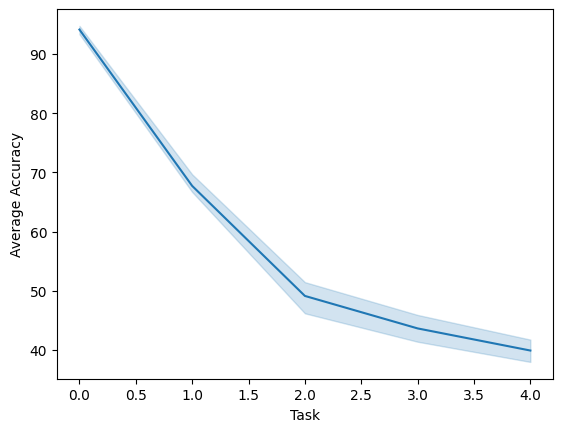

In [44]:
sns.lineplot( data_rere,  x='Task', y='Average Accuracy')

In [45]:
data_rere.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
ReReLRP  0                94.13                 NaN
         1                67.73               10.88
         2                49.14               20.97
         3                43.65               21.46
         4                39.91               19.00

In [46]:
path_lwm = '/home/karokaro/research-repositories/FACIL/results/cifar10_joint_final_cifar'

In [47]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_lwm) if isfile(join(path_lwm, f))]
onlyfiles

['stderr-2025-01-14-21-13.txt',
 'args-2025-01-14-22-12.txt',
 'raw_log-2025-01-14-20-50.txt',
 'stdout-2025-01-14-22-59.txt',
 'stdout-2025-01-14-20-50.txt',
 'stdout-2025-01-14-21-31.txt',
 'stdout-2025-01-14-22-12.txt',
 'raw_log-2025-01-14-22-46.txt',
 'stderr-2025-01-14-22-12.txt',
 'args-2025-01-14-22-46.txt',
 'stderr-2025-01-14-22-46.txt',
 'args-2025-01-14-22-31.txt',
 'args-2025-01-14-22-59.txt',
 'stdout-2025-01-14-22-46.txt',
 'raw_log-2025-01-14-21-52.txt',
 'raw_log-2025-01-14-21-31.txt',
 'stderr-2025-01-14-20-50.txt',
 'raw_log-2025-01-14-22-59.txt',
 'stderr-2025-01-14-22-31.txt',
 'stderr-2025-01-14-23-18.txt',
 'raw_log-2025-01-14-22-31.txt',
 'stdout-2025-01-14-22-31.txt',
 'raw_log-2025-01-14-22-12.txt',
 'stderr-2025-01-14-21-52.txt',
 'stdout-2025-01-14-23-18.txt',
 'args-2025-01-14-21-52.txt',
 'args-2025-01-14-20-50.txt',
 'stderr-2025-01-14-21-31.txt',
 'stdout-2025-01-14-21-52.txt',
 'args-2025-01-14-23-18.txt',
 'raw_log-2025-01-14-23-18.txt',
 'stderr-2025-

In [48]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [49]:
import json
arg_dict = {}
for file in args:
    with open(join(path_lwm, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [50]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_lwm, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [51]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [4]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [52]:
import pandas as pd
import numpy as np
from itertools import chain
data_joint = pd.DataFrame({'Approach': list(chain.from_iterable([['Joint' for i in range(5)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(5)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in range(5)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_tag" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(5)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/tmp/ipykernel_33984/2585113533.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot( data_joint,  x='Task', y='Average Accuracy', ci=None)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

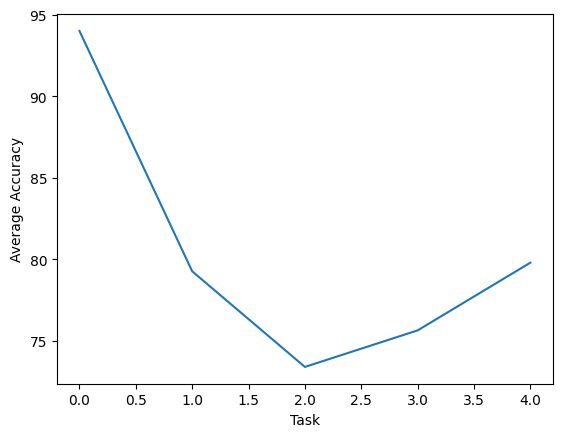

In [53]:
sns.lineplot( data_joint,  x='Task', y='Average Accuracy', ci=None)

In [54]:
data_joint.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
Joint    0                94.00                 NaN
         1                79.27                3.60
         2                73.42                6.56
         3                75.65                5.79
         4                79.80                2.18

In [55]:
data_all = pd.concat([data, data_ewc, data_icarl, data_rere, data_joint, data_lwm], ignore_index=True)

/tmp/ipykernel_33984/3754133431.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.lineplot( data_all, hue='Approach', x='Task', y='Average Accuracy', hue_order=hue_order, ci=None)


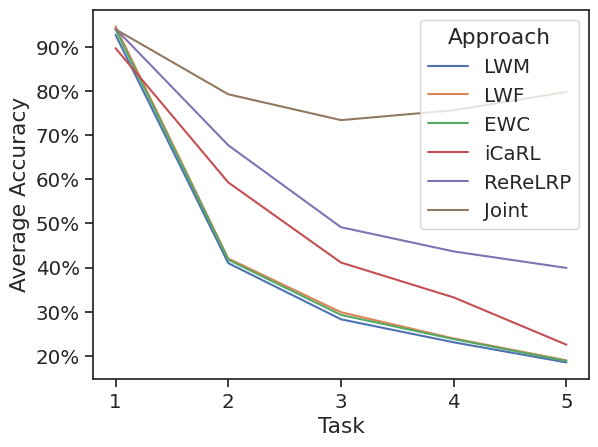

In [56]:
import matplotlib.pyplot as plt
hue_order = ["LWM", "LWF", "EWC", "iCaRL", "ReReLRP", "Joint"]
paletter = sns.color_palette("colorblind", 6)
sns.set_theme(style="ticks", font_scale=1.3) 
g = sns.lineplot( data_all, hue='Approach', x='Task', y='Average Accuracy', hue_order=hue_order, ci=None)
g.set_xticks(range(5))
g.set_xticklabels([i+1 for i in range(5)])
import matplotlib.ticker as mtick
g.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.savefig("cifar10.pdf", format='pdf', bbox_inches='tight')